# Project 2: Investigate a Dataset (Investigation of No-Show Medical Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The dataset under investigation is a collection of information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Various characteristics about the patient are included such as Gender and Age as well as each individual's primary health designation(s) such as Hypertension, Alcoholism, Diabetes etc. The questions investigated below are as follows:-


<li>What proportion of people show-up?</li>
<li>Which all patient health designation influence no-show/show-up rate?</li>
<li>From which neighbourhoods people are most likely & least likely to show-up? </li>
<li>How does age, total number of missed appointments & waiting time influence no-show/show-up rate?</li>

## The Investigation

## Data Wrangling

### Step 1: Import data analysis packages
This investigation makes uses of the following data analytics packages:

<li>Pandas. Provides flexible and powerful data structures designed to make working with “relational” or “labeled” data intuitive.</li>
<li>Numpy. Provides functions to create and manipulate numerical data with speed.</li>
<li>Seaborn. Provides a high-level interface for drawing attractive statistical graphics.</li>
<li>Matplotlib. Provide publication quality figures in a variety of formats with just a few lines of code.</li>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Step 2: Load data into the Jupyter notebook

In [2]:
df=pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')

### Step 3: Descriptive Summary

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
print('Rows :', df.shape[0], '\nColumns :', df.shape[1])

Rows : 110527 
Columns : 14


## Data Cleaning
### Step 1: Fixing column mispellings

In [6]:
names=['patientID', 'appointmentID', 'gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood', 'scholarship','hypertension', 'diabetes','alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns=names

### Step 2: Checking for any missing values and fixing them

In [7]:
df.isnull().any()

patientID          False
appointmentID      False
gender             False
scheduled_day      False
appointment_day    False
age                False
neighbourhood      False
scholarship        False
hypertension       False
diabetes           False
alcoholism         False
handicap           False
sms_received       False
no_show            False
dtype: bool

### Step 3: Checking the age distribution and removing any unwanted values or outliers

In [8]:
print('Age Range:', sorted(df.age.unique()))

Age Range: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


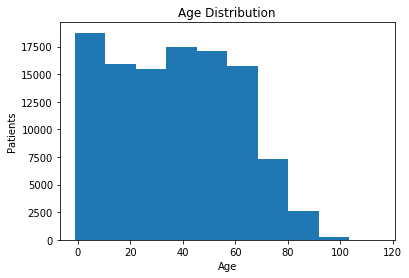

In [9]:
plt
age_plot=df.age.plot.hist()
age_plot.set_xlabel('Age')
age_plot.set_ylabel('Patients')
age_plot.set_title('Age Distribution');

In [10]:
df=df[(df['age']>= 0) & (df['age']<=90)]

In [11]:
print('Minimum age:', df.age.min())
print('Maximum age:', df.age.max())

Minimum age: 0
Maximum age: 90


### Step 4: Transforming data type of patientID and no_show to integer

In [12]:
df.patientID=df.patientID.astype(int)

In [13]:
df.no_show.replace({'No': 0, 'Yes': 1}, inplace=True)

In [14]:
df.head(1)

,patientID,appointmentID,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110218 entries, 0 to 110526
Data columns (total 14 columns):
patientID          110218 non-null int64
appointmentID      110218 non-null int64
gender             110218 non-null object
scheduled_day      110218 non-null object
appointment_day    110218 non-null object
age                110218 non-null int64
neighbourhood      110218 non-null object
scholarship        110218 non-null int64
hypertension       110218 non-null int64
diabetes           110218 non-null int64
alcoholism         110218 non-null int64
handicap           110218 non-null int64
sms_received       110218 non-null int64
no_show            110218 non-null int64
dtypes: int64(10), object(4)
memory usage: 12.6+ MB


### Step 5: Transforming scheduled_day & appointment_day into proper datatype and format

In [16]:
df.scheduled_day=pd.to_datetime(df.scheduled_day)

In [17]:
df.appointment_day=pd.to_datetime(df.appointment_day)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110218 entries, 0 to 110526
Data columns (total 14 columns):
patientID          110218 non-null int64
appointmentID      110218 non-null int64
gender             110218 non-null object
scheduled_day      110218 non-null datetime64[ns]
appointment_day    110218 non-null datetime64[ns]
age                110218 non-null int64
neighbourhood      110218 non-null object
scholarship        110218 non-null int64
hypertension       110218 non-null int64
diabetes           110218 non-null int64
alcoholism         110218 non-null int64
handicap           110218 non-null int64
sms_received       110218 non-null int64
no_show            110218 non-null int64
dtypes: datetime64[ns](2), int64(10), object(2)
memory usage: 12.6+ MB


In [18]:
df.scheduled_day=df.scheduled_day.apply(lambda x: x.strftime('%m-%d-%Y'))
df.appointment_day=df.appointment_day.apply(lambda x: x.strftime('%m-%d-%Y'))
df.head()

,patientID,appointmentID,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,04-29-2016,04-29-2016,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,04-29-2016,04-29-2016,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,04-29-2016,04-29-2016,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,04-29-2016,04-29-2016,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,04-29-2016,04-29-2016,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [19]:
df.scheduled_day=pd.to_datetime(df.scheduled_day)
df.appointment_day=pd.to_datetime(df.appointment_day)

### Step 6: Calculate waiting days

In [20]:
df['waiting_days']=df['scheduled_day'].sub(df.appointment_day, axis=0)
df['waiting_days']=(df['waiting_days']/np.timedelta64(1, 'D')).abs()

In [21]:
df['tot_app_missed']=df.groupby('patientID')['no_show'].apply(lambda x:x.cumsum())

### Step 7: Calculate total appointments missed for each patient

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110218 entries, 0 to 110526
Data columns (total 16 columns):
patientID          110218 non-null int64
appointmentID      110218 non-null int64
gender             110218 non-null object
scheduled_day      110218 non-null datetime64[ns]
appointment_day    110218 non-null datetime64[ns]
age                110218 non-null int64
neighbourhood      110218 non-null object
scholarship        110218 non-null int64
hypertension       110218 non-null int64
diabetes           110218 non-null int64
alcoholism         110218 non-null int64
handicap           110218 non-null int64
sms_received       110218 non-null int64
no_show            110218 non-null int64
waiting_days       110218 non-null float64
tot_app_missed     110218 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(11), object(2)
memory usage: 14.3+ MB


In [23]:
df.head()

,patientID,appointmentID,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_days,tot_app_missed
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0.0,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0.0,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0.0,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0.0,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0.0,0


### Step 8: Create new dataframe for people who show up

In [28]:
shows_up=df.query('no_show =="0"')
shows_up.head()

,patientID,appointmentID,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_days,tot_app_missed
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0.0,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0.0,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0.0,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0.0,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0.0,0


### Step 9: Create new dataframe for people who donot show up

In [29]:
notshow_up=df.query('no_show =="1"')
notshow_up.head()

,patientID,appointmentID,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_days,tot_app_missed
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,2.0,1
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,2.0,1
11,7542951368435,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,1,3.0,1
17,14794966191172,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,1,1.0,1
20,622257462899397,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,1,2.0,1


<a id='eda'></a>
## Exploratory Data Analysis



### Finding proportion of people who show-up

In [24]:
print('sms_received:',df.sms_received.unique())
print('gender:',df.gender.unique())
print('handicap:',df.handicap.unique())
print('scholarship:',df.scholarship.unique())
print('diabetes:',df.diabetes.unique())
print('no_show:',df.no_show.unique())
print('alcoholism:',df.alcoholism.unique())
print('hypertension:',df.hypertension.unique())

sms_received: [0 1]
gender: ['F' 'M']
handicap: [0 1 2 3 4]
scholarship: [0 1]
diabetes: [0 1]
no_show: [0 1]
alcoholism: [0 1]
hypertension: [1 0]


In [25]:
new_df=df.groupby('no_show')['no_show'].agg(['count'])
new_df.reset_index(inplace=True)
new_df.columns = ['appt_status', 'total']
new_df.iloc[0,0] = "No Show"
new_df.iloc[1,0] = "Show"

In [26]:
noshow_prop=new_df.iloc[0,1]/(new_df.iloc[0,1]+new_df.iloc[1,1])
show_prop=new_df.iloc[1,1]/(new_df.iloc[0,1]+new_df.iloc[1,1])

In [27]:
new_df['proportion']=(noshow_prop, show_prop)
new_df

,appt_status,total,proportion
0,No Show,87961,0.798064
1,Show,22257,0.201936


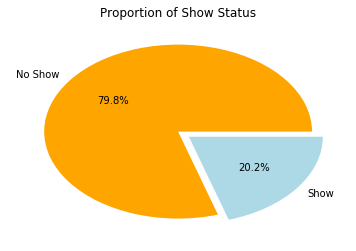

In [25]:
sizes= (noshow_prop, show_prop)
colors=('orange', 'lightblue')
labels=('No Show', 'Show')
explode=(0, 0.1)

plt.pie(sizes, explode=explode, colors=colors , startangle=0, autopct='%1.1f%%', labels=labels )
plt.title('Proportion of Show Status');

### How each feature relates to show-up?

In [26]:
columns=['scholarship', 'diabetes', 'alcoholism', 'hypertension', 'sms_received']
for r in columns:
    print(df.groupby(r)['no_show'].mean())

scholarship
0    0.198064
1    0.237363
Name: no_show, dtype: float64
diabetes
0    0.203632
1    0.180003
Name: no_show, dtype: float64
alcoholism
0    0.201950
1    0.201488
Name: no_show, dtype: float64
hypertension
0    0.209093
1    0.172570
Name: no_show, dtype: float64
sms_received
0    0.166932
1    0.275890
Name: no_show, dtype: float64


<li>People enrolled in  Brasilian welfare program show up less</li>
<li>People with diabetes show up more</li>
<li>Alcoholism doesn't effect show ups</li>
<li>People with hypertension show up more</li>
<li>Sending SMS doesnot increase show ups</li>


### Show top 10 neighbourhoods from which most people show-up

In [29]:
shows_head=shows_up.groupby('neighbourhood')['no_show'].count().reset_index(name='count').sort_values("count", ascending=False)
shows_head.head(10)

,neighbourhood,count
37,JARDIM CAMBURI,6235
42,MARIA ORTIZ,4573
58,RESISTÊNCIA,3510
38,JARDIM DA PENHA,3231
65,SANTA MARTHA,2621
10,CENTRO,2616
35,ITARARÉ,2584
77,TABUAZEIRO,2543
68,SANTO ANTÔNIO,2255
8,BONFIM,2218


### Show top 10 neighbourhoods from which most people donot show-up

In [30]:
noshow_head=notshow_up.groupby('neighbourhood')['no_show'].count().reset_index(name='count').sort_values('count', ascending=False)
noshow_head.head(10)

,neighbourhood,count
38,JARDIM CAMBURI,1464
43,MARIA ORTIZ,1218
36,ITARARÉ,917
58,RESISTÊNCIA,905
10,CENTRO,698
40,JESUS DE NAZARETH,694
39,JARDIM DA PENHA,625
9,CARATOÍRA,585
77,TABUAZEIRO,569
8,BONFIM,547


### Which factors are important to decide if people will show-up for their appointement or not

In [31]:
def prob1(dataset, groupby):
    df=pd.crosstab(index=dataset[groupby], columns=dataset['no_show']).reset_index()
    df['Probability_of_Showingup']=df[0]/(df[0]+df[1])
    return df[[groupby, "Probability_of_Showingup"]]

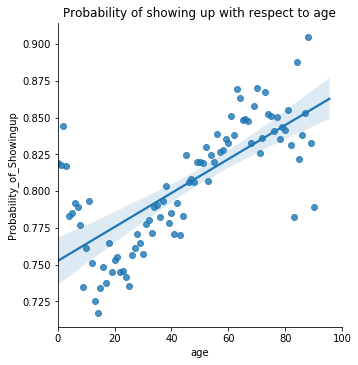

In [32]:
sns.lmplot(data=prob1(df, "age"), x="age", y="Probability_of_Showingup", fit_reg=True);
plt.xlim(0,100)
plt.title('Probability of showing up with respect to age')
plt.show()

> So with increasing age the chances of showing-up for an appointment increases

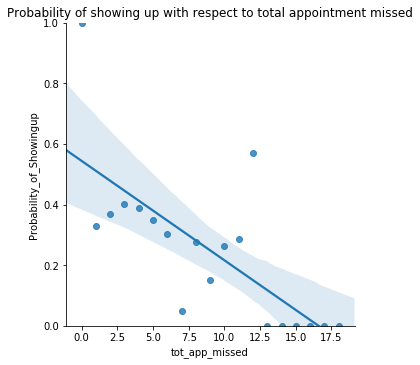

In [33]:
sns.lmplot(data=prob1(df, 'tot_app_missed'), x='tot_app_missed', y='Probability_of_Showingup', fit_reg=True)
plt.title('Probability of showing up with respect to total appointment missed')
plt.ylim(0,1)
plt.show()

> So people who have missed more appointments are less likely to show-up

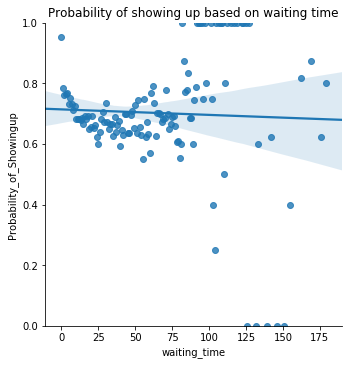

In [49]:
sns.lmplot(data=prob1(df, 'waiting_time'), x='waiting_time', y='Probability_of_Showingup', fit_reg=True)
plt.title('Probability of showing up based on waiting time')
plt.ylim(0,1)
plt.show();

> Waiting time doesn't seem to affect show-up rates

<a id='conclusions'></a>
## Conclusions

<li>Almost 80% of all appointments investigated didnot show-up.</li>
<li>Certain age groups appear to be more likely to miss appointments.</li>
<li>People with diabetes show up more.</li>
<li>SMS reminder didn't increase show ups.</li>
<li> Parameters such as total appointments missed, number of waiting days and Age are good predictors of ٍShowing up.</li>
<li>People enrolled in Brasilian welfare program (low income group) show up less.</li>

## Project Limitations 

<li>Outliers in data- certain outliers such as age outliers had to be removed</li>
<li>Most of the samples seem to be from just a few cities</li>
<li>Including more parameters such as traffic, weather, or geographic data could allow us to better understand influencers of not showing-up</li>

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0